### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [7]:
from sklearn import datasets, metrics
digits = datasets.load_digits()

In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import warnings
warnings.simplefilter('ignore')

In [41]:
print(digits.data.shape)
X = digits.data
y = digits.target
print(np.bincount(y))

(1797, 64)
[178 182 177 183 181 182 181 179 174 180]


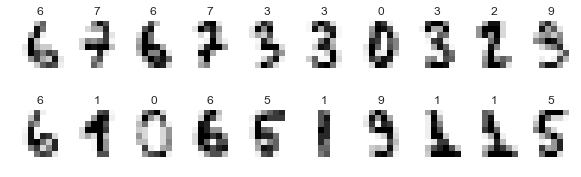

In [42]:
fig, axes = plt.subplots(2, 10, figsize=(10, 3))
for ax in axes.ravel():
    i = np.random.randint(0, digits.data.shape[0], 1)[0]
    ax.imshow(X[i].reshape(8, 8))
    ax.axis('off')
    ax.set_title(y[i])

In [21]:
print(digits.DESCR);

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [23]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

class GradientBoostingClassifierEvaluator():
    def __init__(self, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001):

        # 建立模型
        self.clf = GradientBoostingClassifier(loss, learning_rate, n_estimators, subsample, criterion, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_depth, min_impurity_decrease, min_impurity_split, init, random_state, max_features, verbose, max_leaf_nodes, warm_start, presort, validation_fraction, n_iter_no_change, tol)

    def run(self, dataset):

        # 切分訓練集/測試集
        x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=4)


        # 訓練模型
        self.clf.fit(x_train, y_train)

        # 預測測試集
        y_pred = self.clf.predict(x_test)

        acc = metrics.accuracy_score(y_test, y_pred)

        print("Acuuracy: ", acc)

        if 'feature_names' in dataset:
            
            print(dataset.feature_names)
            print("Feature importance: ", self.clf.feature_importances_)
            

In [30]:
evaluator = GradientBoostingClassifierEvaluator()
evaluator.run(digits)

Acuuracy:  0.9644444444444444


In [31]:
evaluator = GradientBoostingClassifierEvaluator(loss='deviance')
evaluator.run(digits)

Acuuracy:  0.9644444444444444


In [38]:
evaluator = GradientBoostingClassifierEvaluator(max_depth=2)
evaluator.run(digits)

Acuuracy:  0.9688888888888889
